# CSE2530 Computational Intelligence
## Assignment 1: Artificial Neural Networks

<div style="background-color:#f1be3e">

_Fill in your group number **from Brightspace**, names, and student numbers._
    
|    Group   |           25          |
|------------|----------------------|
| Antonio Lupu  |        5677211       |
| Eve Smura  |        5815592|
| Jannes Kelso  |        5531543       |
| Maria Cristescu  |        5704502       |

#### Imports

In [1]:
# You may only use numpy to implement your neural network
# You are not allowed to use scikit-learn, other than for Section 1.6.
# You are also not allowed to use Pytorch, Tensorflow, and similar machine learning frameworks.
# You can make use of any other libraries for miscellaneous functions, e.g. to create the visual aids.

# Put all of your imports in this code block
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#### Loading the data

In [2]:
features = np.genfromtxt("../data/features.txt", delimiter=",")
targets = np.genfromtxt("../data/targets.txt", delimiter=",")
unknown = np.genfromtxt("../data/unknown.txt", delimiter=",")

## 1 Questions
### 1.2 Architecture
#### Question 1:

In [3]:
# Put your code for Question 1 here
class Perceptron:
    # Weights: the weights for each input feature
    # Bias: Single bias value
    # Alpha: The rate of training
    # Step: The actiovation function, by default just >=0 returns 1
    def __init__(self, weights: np.ndarray, bias: float=0, alpha: float=0.1, step=None):
        self.weights = weights
        self.bias = bias
        self.alpha = alpha
        if step: self.step = step
        else: self.step = self.defaultStep
    
    # Default activation function with >=0 returning 1
    def defaultStep(self, n):
        if n >= 0: return 1
        return 0
    
    # Classify a data point
    def classify(self, features: np.ndarray):
        z = self.weights.T @ features + self.bias
        
        return self.step(z)
    
    # Train once on a data point
    def train(self, features: np.ndarray, target: int):
        y = self.classify(features)
        loss = target - y
        
        # Adjust weights and bias
        self.weights = self.weights + (self.alpha * features * loss)
        self.bias = self.bias + (self.alpha * loss)
        
        return loss
    
    # Train the perceptron until the threshold is met or max_iter is reached.
    # Continually updates weights and biases
    # Returns final losses
    def train_fully(self, features: np.ndarray, targets: int, threshold: float, max_iter: int=100):
        loss = sys.maxsize
        iter = 0
        errors = np.zeros(max_iter)
        weights_over_time = np.zeros((max_iter, self.weights.size))
        bias_over_time = np.zeros(max_iter)
        
        # Iterate over each epoch
        while loss > threshold and iter < max_iter:
            loss = 0
            # Iterate over each data point
            for feature, target in zip(features, targets):
                # Update weights and biases and compute squared loss
                loss += self.train(feature, target)**2
                
            loss /= np.sqrt(features.shape[0])
            errors[iter] = loss
            weights_over_time[iter] = self.weights
            bias_over_time[iter] = self.bias
            iter += 1
        
        return errors[:iter], weights_over_time[:iter], bias_over_time[:iter]

In [4]:
and_data = np.array([[0, 0, 0],
                [0, 1, 0],
                [1, 0, 0],
                [1, 1, 1]])

or_data = np.array([[0, 0, 0],
                [0, 1, 1],
                [1, 0, 1],
                [1, 1, 1]])
    
xor_data = np.array([[0, 0, 0],
                [0, 1, 1],
                [1, 0, 1],
                [1, 1, 0]])

Here, we visualize the graphs of the loss over epochs, for each of the AND, OR and XOR perceptron trainings. 

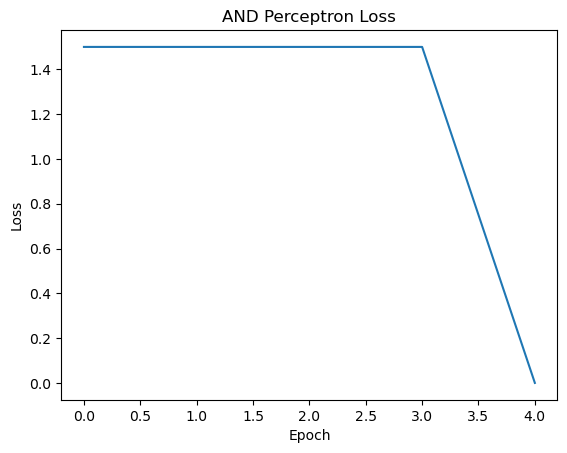

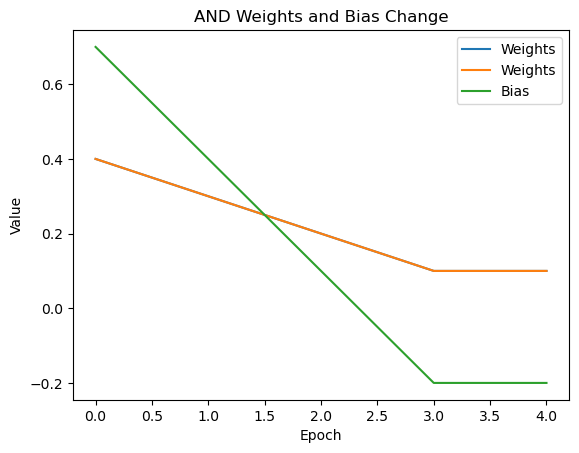

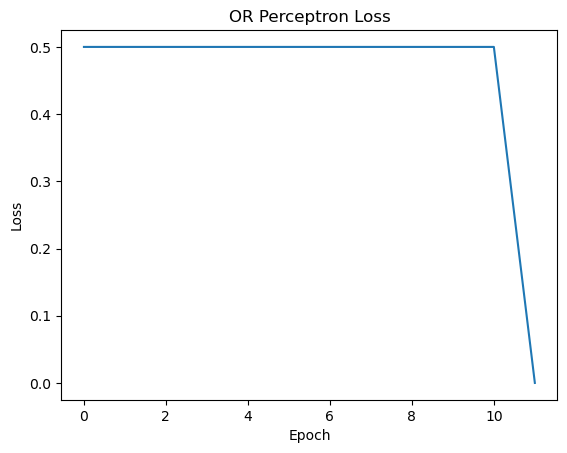

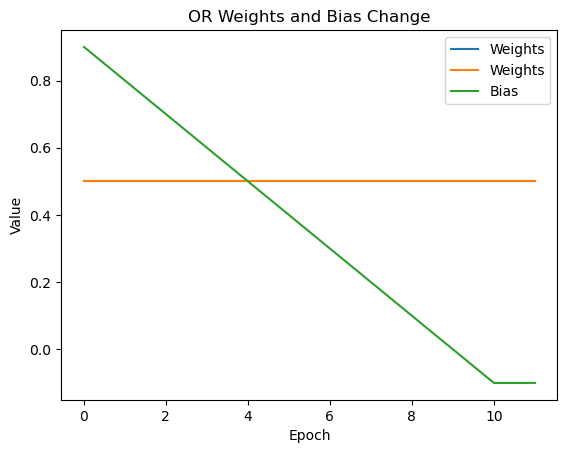

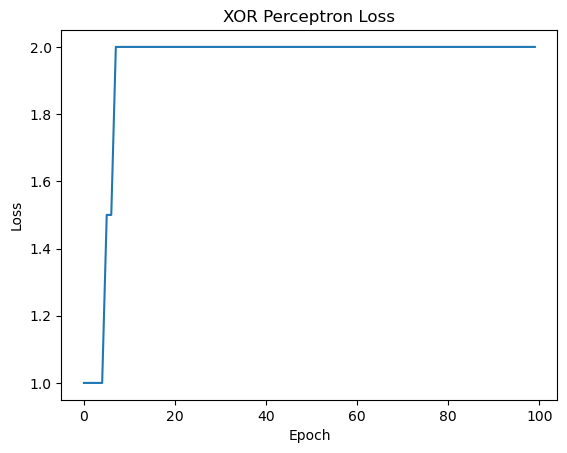

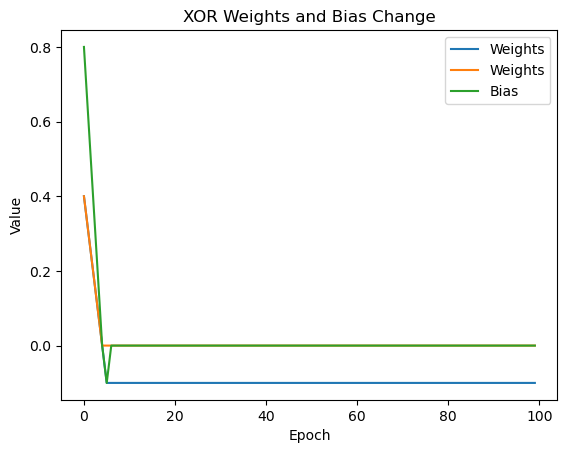

In [5]:
p = Perceptron(np.array([0.5, 0.5]), 1)

# Training and graphing the loss for the AND perceptron
and_errors, and_weights_over_time, and_bias = p.train_fully(and_data[:,0:2], and_data[:,2], 0.1)

# Plot the errors over epochs for the AND Perceptron
plt.plot(and_errors)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("AND Perceptron Loss")
plt.show()

#Plot the change in weights and bias over epochs for the AND Perceptron
plt.plot(and_weights_over_time, label = 'Weights')
plt.plot(and_bias, label = 'Bias')
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("AND Weights and Bias Change")
plt.legend()
plt.show()

# Training and graphing the loss for the OR perceptron
p = Perceptron(np.array([0.5, 0.5]), 1)
or_errors, or_weights_over_time, or_bias = p.train_fully(or_data[:,0:2], or_data[:,2], 0.1)
# Plot the error over epochs for the OR perceptron
plt.plot(or_errors)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("OR Perceptron Loss")
plt.show()
# Plot the change in weights and bias over epochs for the OR perceptron
plt.plot(or_weights_over_time, label = 'Weights')
plt.plot(or_bias, label = 'Bias')
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("OR Weights and Bias Change")
plt.legend()
plt.show()

# Training and graphing the loss for the XOR perceptron
p = Perceptron(np.array([0.5, 0.5]), 1)
xor_errors, xor_weights_over_time, xor_bias = p.train_fully(xor_data[:,0:2], xor_data[:,2], 0.1)

#Plot the error over epochs for the XOR perceptron
plt.plot(xor_errors)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("XOR Perceptron Loss")
plt.show()

#Plot the change in weights and bias over epochs for the OR perceptron
plt.plot(xor_weights_over_time, label = 'Weights')
plt.plot(xor_bias, label = 'Bias')
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("XOR Weights and Bias Change")
plt.legend()
plt.show()

<div style="background-color:#f1be3e">

As can be seen above, the AND and OR perceptrons achieve good results quite quickly - the weights and the bias adjust themselves correctly, and they finally reach a loss of 0. In contrast, the XOR perceptron is not able to get below a loss of 2. 
The plots of the perceptron losses are meant to show the loss change over time, and the weights and bias change plots are meant to give further insight into why the loss behaves the way it does.

#### Question 2

<div style="background-color:#f1be3e">

In the classification task described, we would need 10 neurons since we have 10 features in our sample set. 
Having one input neuron for each feature allows the neural network to directly receive and process the information contained in each feature, and it will allow the backpropagation to change the weights ("importance") of each feature, later on.

#### Question 3

<div style="background-color:#f1be3e">

We would need 7 output neurons, since we want to classify the data into 7 distinct classes (as can be seen in the "targets.txt" file). 
Having 7 output neurons, one for each target class, would allow the neural network to output a probability distribution across the 7 classes, with each neuron representing the likelihood of the input belonging to its corresponding class.

#### Question 4

<div style="background-color:#f1be3e">

According to various online resources 2 or 3 hidden layers should be enough given a smaller data set so we will go with 2 for now. The number of nodes in each layer might be around 20 in order to give the network enough room to properly introduce non-linearities and find patterns.

#### Question 5

<div style="background-color:#f1be3e">

Since we have a multiclass classification problem with mutually exclusive labels (because we cannot have objects that are in two or more classes at once, for example fruit and candy at the same time) we will use the "softmax" activation function, as this is the best fit. 

#### Question 6

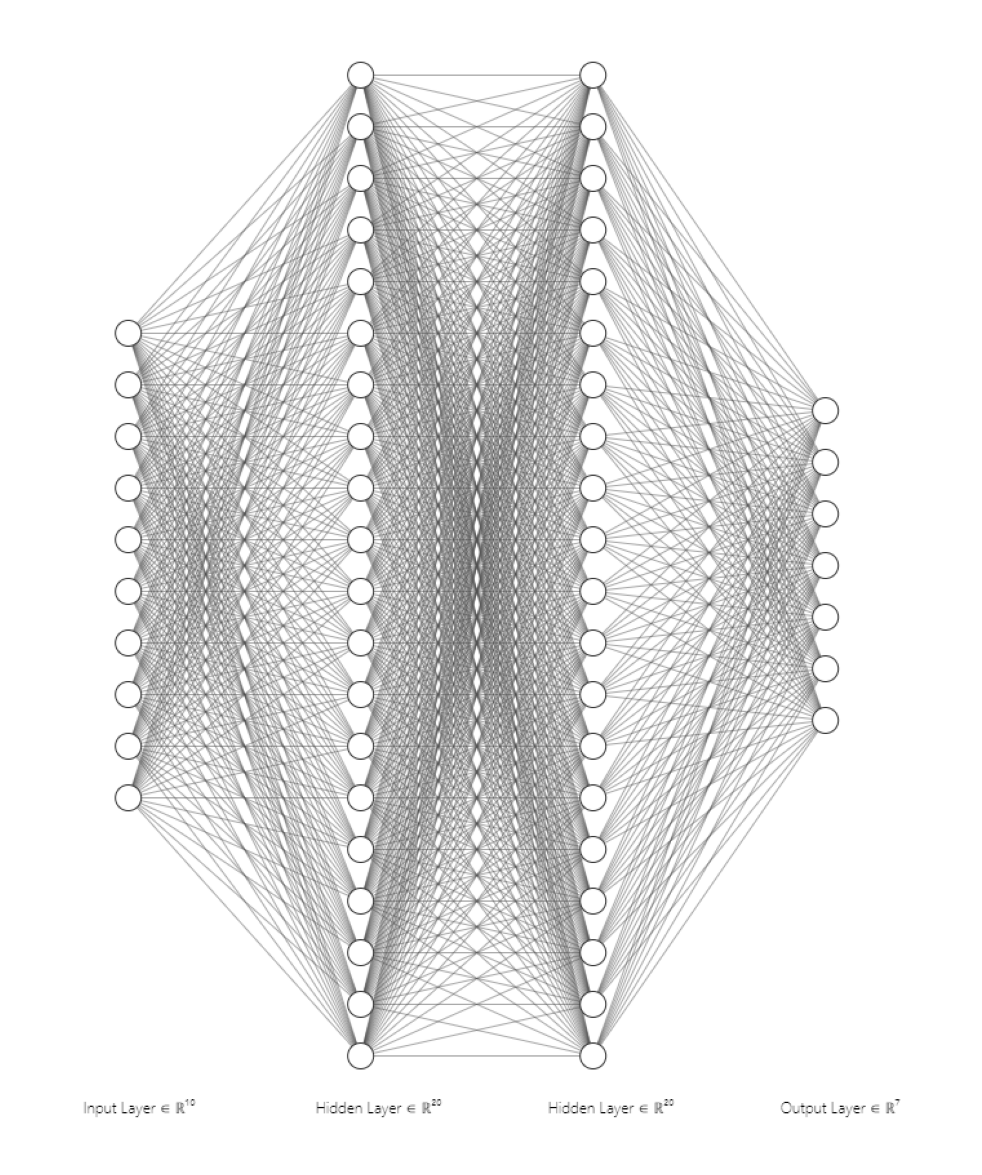

In [6]:
# Created using this tool: https://alexlenail.me/NN-SVG/index.html

plt.figure(figsize = (15,15))
plt.imshow(mpimg.imread("guess_schema.png"))
plt.axis('off')
plt.show()

### 1.3 Training

When coding a neural network from scratch, it helps to think of a layer as an individual component that can be easily combined with other layers. To help you create a modular implementation of a neural network, we provide you with a template for the implementation along with some explanations.

**Note that using the template below is not mandatory. You may choose to modify this template or implement your own version of the neural network altogether. If the latter, please remove our template from the notebook and ensure that it instead includes a complete, fully functional implementation of your own.**

**Linear (fully connected) layer**

A linear or fully connected layer maps the input data to an output by performing a linear transformation, where each input neuron is connected to every output neuron. The forward pass of a linear layer is computed as $y = wx + b$, where $w$ and $b$ are trainable parameters. The gradients of the loss with respect to $w$ and $b$ are defined using the chain rule:

$$\frac{\partial \mathcal{L}}{\partial w}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial w}, \quad \frac{\partial \mathcal{L}}{\partial b}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial b}, $$

where $\frac{\partial \mathcal{L}}{\partial y}$ is the upstream gradient i.e., the gradient flowing from deeper layers into the current layer, and the other two terms are the local gradients:

$$
\frac{\partial y}{\partial w}=x, \quad \frac{\partial y}{\partial b}=1.
$$

Since $x$ is needed to compute the gradients, we can store (cache) its value during the forward pass. Finally, we need to return a downstream gradient so that more shallow layers can use it as their upstream gradient. The downstream gradient of a layer is simply its upstream gradient multiplied by the local gradient of its ouput with respect to its input:

$$
\frac{\partial \mathcal{L}}{\partial x}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

**Note.** Be aware of how you multiply the arrays, it might be useful to print the shapes of each array and to think about the desired shape of the output.  

In [7]:
class Linear:
    def __init__(self, in_features, out_features, weight_init="xavier", is_output=False):
        """ Randomly initialize the weights and biases.

        Args:
            in_features: number of input features.
            out_features: number of output features.
        """
        if weight_init == "xavier":
            self.weights = np.random.normal(0, 1 / in_features, (in_features, out_features))
        elif weight_init == "normal":
            self.weights = np.random.normal(0, 1, (in_features, out_features))
        elif weight_init == "uniform":
            self.weights = np.random.uniform(-1, 1, (in_features, out_features))
        elif weight_init == "he":
            scale = np.sqrt(2 / in_features)
            self.weights = np.random.normal(0, scale, (in_features, out_features))
        else:
            self.weights = np.ones((in_features, out_features))
            
        self.bias = np.zeros((1, out_features))
        self.is_output = is_output
        self.cache = None

        # For storing the gradients w.r.t. the weight and the bias
        self.weight_grad = None
        self.bias_grad = None


    def forward(self, x):
        """ Perform the forward pass of a linear layer. 
        Store (cache) the input so it can be used in the backward pass.

        Args:
            x:  
                input of a linear layer
                it is an array of inputs, allowing for much flexibility:
                    if there is just 1 element we do stochastic gradient descent
                    if there is the entire training dataset in there it is batch gradient descent
                    if there is any numebr between there is minibatch gradient descent

        Returns: 
            y: output of a linear layer. 
        """
        self.cache = x
        return np.dot(x, self.weights) + self.bias
        
    def backward(self, upstream_grad):
        """ Perform the backward pass of a linear layer.  

        Args:
            upstream_grad: upstream gradient. 

        Returns:
            downstream_grad: downstream gradient.
        """
        self.weight_grad = np.dot(self.cache.T, upstream_grad)
        self.bias_grad = np.sum(upstream_grad, axis=0, keepdims=True)

        return np.dot(upstream_grad, self.weights.T)

**Activation functions**

You also need to implement an activation function suitable for the task at hand.

Think about how to perform the backward pass i.e., what is the local gradient and what the downstream gradient should be. Do not forget to take the upstream gradient into account.

In [8]:
class ActivationSoftMax():
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output so it can be used in the backward pass.

        Args:
            x: input to the activation function. 

        Returns:
            y: output of the activation function.
        """
        # We are using the softmax activation function: it uses the exponential function on each element
        # Then scales all the elements so that the sum of the probabilities sums up to 1
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        probs = exps / np.sum(exps, axis=1, keepdims=True)
        self.cache = probs

        return probs
    
    def backward(self, upstream_grad): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original upstream_grad.

        Args:
            upstream_grad: upstream gradient. 

        Returns:
            downstream_grad: downstream gradient.
        """


        return upstream_grad

        

In [9]:
def test_activation_softmax():
    # Create instance of class
    softmax_activation = ActivationSoftMax()

    # Test forward pass
    x_forward = np.array([[1, 2, 3], [4, 5, 6]])
    expected_probs = np.array([[0.09003057, 0.24472847, 0.66524096],
                               [0.09003057, 0.24472847, 0.66524096]])
    actual_probs = softmax_activation.forward(x_forward)
    assert np.allclose(expected_probs, actual_probs), "Forward pass test failed"

    # Test backward pass (gradient should be equal to upstream gradient) - not much of a test
    upstream_grad = np.ones_like(actual_probs)
    actual_grad = softmax_activation.backward(upstream_grad)
    assert np.allclose(upstream_grad, actual_grad), "Backward pass test failed"

# Run the test
test_activation_softmax()


In [10]:
class ActivationLRELU():
    def __init__(self):
        self.cache = None

    def forward(self, x):
        self.cache = np.maximum(0.01 * x, x)
        return self.cache

    def backward(self, upstream_grad):
        temp = np.where(self.cache > 0, 1, 0.01)
        return upstream_grad * temp

In [11]:
def test_activation_lrelu():
    # Initialize function
    activation_lrelu = ActivationLRELU()

    # Input
    x = np.array([[-1, 0, 1], [2, -2, 3]])

    # Expected output
    expected_output = np.array([[-0.01, 0, 1], [2, -0.02, 3]])

    # Perform forward pass
    output = activation_lrelu.forward(x)

    # Check if output matches expected output
    assert np.allclose(output, expected_output), "Test failed: ActivationLRELU forward pass."


    # Test upstream gradient
    upstream_grad = np.array([[1, 2, 3], [4, 5, 6]])

    # Expected output
    expected_output = np.array([[0.01, 0.02, 3], [4, 0.05, 6]])

    # Perform backward pass
    output = activation_lrelu.backward(upstream_grad)

    # Check if the output matches the expected output
    assert np.allclose(output, expected_output), "Test failed: ActivationLRELU backward pass."

    

test_activation_lrelu()


In [12]:
# # Test Forward and Backward Propagation

# # Setup weights and biases
# l = Linear(4,5)
# l2 = Linear(5,5)
# l3 = Linear(5,6,True)
# # l.weight = np.array([[1,0.5],[1,-0.5]])
# # l.bias = np.array([[0.5],[0]])

# # print("w1: ", l.weight)
# y1 = l.forward(np.array([[1,0.3,0,-0.6],[-0.1,0,.7,1]]))
# y2 = l2.forward(y1)
# y3 = l3.forward(y2)

# print("------ layer 1 ------")
# g3 = l3.backward(np.array([-0.2,0,0.3,0.1,0.89,0]))
# print("------ layer 2 ------")
# g2 = l2.backward(g3)
# print("------ layer 3 ------")
# g1 = l2.backward(g2)
# # print("w1: ", l.weight)

# # Calculated the expected response by hand and assert it
# # np.testing.assert_allclose(l.forward(np.array([[0,0],[1,2]])), np.array([[0.5, 2.5],[0,0]]))
# # np.testing.assert_allclose(l.backward(np.array([-0.2,0.1])).reshape(-1,1), np.array([[-0.1],[-0.15]]))
# # np.testing.assert_allclose(l.weight_grad, np.array([[-0.1, -0.2],[0.05, 0.1]]))
# # np.testing.assert_equal(l.bias_grad, -0.1)

**Network** 

Now that you have implemented a `Linear` layer and an activation function, you can combine them in different ways and have the `Network` class perform forward and backward passes through all layer of the network in the specified order.

Additionally, you should make the `Network` class update all the trainable parameters of the network in `optimizer_step`.

In [13]:
class Network:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, x):
        """ Perform a forward pass over the entire network.

        Args:
            x: input data. 

        Returns:
            y: predictions.
        """
        for layer in self.layers:
            x = layer.forward(x)
        return x
        
    def backward(self, dupstream):
        """ Perform a backward pass over the entire network.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        for layer in reversed(self.layers):
            dupstream = layer.backward(dupstream)
        return dupstream
    
    def optimizer_step(self, lr):
        """ Update the weight and bias parameters of each layer.

        Args:
            lr: learning rate.
        """
        for layer in self.layers:
            if isinstance(layer, Linear):
                layer.weights -= lr * layer.weight_grad
                layer.bias -= lr * layer.bias_grad

**Loss function**

You also need to implement a loss function that will measure how well your neural network performs at the task.

In [14]:
def Loss(y_true, y_pred):
    """ Computes the value of the loss function and its gradient.  

    Args:
        y_true: ground truth labels.
        y_pred: predicted labels.

    Returns:
        loss: value of the loss. 
        grad: gradient of loss with respect to the predictions. 
    """
    num_samples = y_true.shape[0]
    num_classes  =y_pred.shape[1]

    # Adjust labels to start from 0
    y_true_adjusted = y_true - 1

    # Convert y_true to one-hot encoded format
    y_true_one_hot = np.eye(num_classes)[y_true_adjusted.astype(int)]

    # Small offset to prevent log(0)
    epsilon = 1e-10

    # Categorical Cross-Entropy Loss (because activation function is softmax)
    loss = -np.mean(np.sum(y_true_one_hot * np.log(y_pred + epsilon), axis=1))

    # Gradient of loss with respect to the predictions
    grad = (y_pred - y_true_one_hot) / num_samples
    
    return loss, grad

In [15]:
def test_loss_function():
    # Test case 1 : Small dummy data with the same shape as our network
    y_true_dummy = np.array([1, 2, 3, 4, 5, 6, 7])  # Dummy true labels
    y_pred_dummy = np.array([[0.1, 0.2, 0.3, 0.1, 0.1, 0.1, 0.1],
                             [0.2, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1],
                             [0.1, 0.2, 0.1, 0.1, 0.3, 0.1, 0.1],
                             [0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.2],
                             [0.2, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1],
                             [0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.0],
                             [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5]])  # Dummy predicted probabilities

    # Compute loss and gradient
    loss_dummy, grad_dummy = Loss(y_true_dummy, y_pred_dummy)

    # Test loss value, gradient shape
    assert np.isclose(loss_dummy, 1.58678, atol=1e-7), "Test case 1: Incorrect loss value" 
    assert grad_dummy.shape == y_pred_dummy.shape, "Test case 1: Incorrect gradient shape"


    # Test case 2: Small input arrays with different shape 
    y_true_1 = np.array([1, 2, 3])
    y_pred_1 = np.array([[0.1, 0.5, 0.4], [0.2, 0.3, 0.5], [0.7, 0.2, 0.1]])
    loss_1, grad_1 = Loss(y_true_1, y_pred_1)
    assert np.isclose(loss_1, 1.93638, atol=1e-7), "Test case 2: Incorrect loss value"
    assert grad_1.shape == y_pred_1.shape, "Test case 2: Incorrect gradient shape"

test_loss_function()


In [16]:
# # Testing Loss function:
# y_true = np.array([[0, 1, 0, 0],
#                    [1, 0, 0, 0]])
# y_pred = np.array([[0.05, 0.85, 0.10, 0],
#                    [0.65, 0.15, 0.10, 0.10]])

# # Value of loss should be approx. 0.1625 
# # (I found an example online with these values)
# loss, grad = Loss(y_true, y_pred)
# print(f"Loss is {loss}")
# print(f"Grad is \n {grad}")
# print("\n")

# # Loss should decrease for the following predictions:

# y_pred = np.array([[0.05, 0.95, 0, 0],
#                    [0.75, 0.15, 0.5, 0.5]])

# loss, grad = Loss(y_true, y_pred)
# print(f"New loss is {loss}")
# print(f"New grad is \n {grad}")

# # The loss decreases now that the values are closer to their true values

# # The first gradient shows that the "highest" (absolute) value 0.0375 corresponds to
# #       the prediction farther away from its true value (1 - 0.85 = 0.15)
# # The second gradient shows that when a predicted value becomes the same as the 
# #       true value, the gradient will be 0

**Training loop**

Finally, define a training loop in which for each optimizer step you:

1. Obtain the predictions by performing a forward pass of the network;

2. Compute the loss and its gradient by comparing the predictions with the ground truth according to the selected criterion;

3. Perform a backward pass of the network;

4. Update all parameters of the network i.e, take an optimizer step.

In [17]:
def train_val_test_split(inputs, labels, train_ratio, val_ratio, test_ratio, cross_validation=False, k_folds=10, current_fold=0):
    num_samples = inputs.shape[0]
    num_train = int(train_ratio * num_samples)
    num_val = int(val_ratio * num_samples)
    num_test = num_samples - num_train - num_val

    indices = np.arange(num_samples)
    if not cross_validation:
        np.random.shuffle(indices)
    else:
        roll_size = int(num_samples / k_folds) * current_fold
        indices = np.roll(indices, roll_size)

    train_indices = indices[:num_train]
    val_indices = indices[num_train:num_train + num_val]
    test_indices = indices[num_train + num_val:]

    X_train, y_train = inputs[train_indices], labels[train_indices]
    X_val, y_val = inputs[val_indices], labels[val_indices]
    X_test, y_test = inputs[test_indices], labels[test_indices]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [18]:
def train(net, inputs, labels, criterion, lr, epochs, batch_size, early_stopping="False", cross_validation=False, k_folds=10, current_fold=0):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        labels: labels. 
        criterion: loss function.
        lr: learning rate.

    Returns:
        losses: a list containing the loss at every optimizer step. 
        accuracies: a list containing the accuracy at every optimizer step. 
    """
    # Split the data
    train_ratio = 0.7
    val_ratio = 0.2
    test_ratio = 0.1
    if not cross_validation:
        X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(inputs, labels, train_ratio, val_ratio, test_ratio)
    else:
        X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(inputs, labels, train_ratio, val_ratio, test_ratio, cross_validation, k_folds, current_fold)
    inputs = X_train
    labels = y_train

    train_losses = []
    train_accuracies = []
    validation_losses = []
    validation_accuracies = []

    last_validation_loss = 10.0
    stop = False

    for epoch in range(epochs):
        # Shuffle the data before each epoch
        indices = np.arange(inputs.shape[0])
        np.random.shuffle(indices)
        inputs = inputs[indices]
        labels = labels[indices]

        epoch_predictions = []
        epoch_losses = []

        for i in range(0, len(inputs), batch_size):
            x_batch = inputs[i:i+batch_size]
            y_batch = labels[i:i+batch_size]

            # Forward pass
            predictions = net.forward(x_batch)
            loss, grad = criterion(y_batch, predictions)

            # Backward pass
            net.backward(grad)

            #Update parameters
            net.optimizer_step(lr)

            epoch_predictions.append(predictions)
            epoch_losses.append(loss)
        
        # Keep predictions for the entire epoch
        epoch_predictions = np.concatenate(epoch_predictions, axis=0)

        # Compute accuracy
        y_pred = np.argmax(epoch_predictions, axis=1)
        y_true_adjusted = labels - 1
        y_true_one_hot = np.eye(7)[y_true_adjusted.astype(int)]

        # Compute accuracy for the entire epoch
        accuracy = np.mean(y_pred == np.argmax(y_true_one_hot, axis=1))
        train_accuracies.append(accuracy)
        
        # Compute loss for the entire epoch
        epoch_loss = np.mean(epoch_losses)
        train_losses.append(epoch_loss)  

        # Evaluate the model on the validation set
        val_predictions = net.forward(X_val)
        val_predictions = np.squeeze(val_predictions)
        val_accuracy = np.mean(np.argmax(val_predictions, axis=1) + 1 == y_val)
        val_loss, _ = criterion(y_val, val_predictions)
        validation_losses.append(val_loss)
        validation_accuracies.append(val_accuracy)

        print(f"-------- Epoch {epoch + 1}/{epochs} --------")
        print(f"Loss: {epoch_loss}, Accuracy: {accuracy}")
        print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

        # Early stopping condition 
        # If Validation Loss increases twice in a row instead of decreasing => STOP training
        if val_loss > last_validation_loss and early_stopping == True:
            if stop == True:
                print(f"Early Stop - Ended at epoch {epoch + 1}")
                break
            else:
                stop = True
        else:
            stop = False

        last_validation_loss = val_loss

    # Evaluate the model on the test set
    test_predictions = net.forward(X_test)
    test_predictions = np.squeeze(test_predictions)
    test_accuracy = np.mean(np.argmax(test_predictions, axis=1) + 1 == y_test)
    test_loss, _ = criterion(y_test, test_predictions)
    print(f"Test Accuracy: {test_accuracy}")

    return train_losses, train_accuracies, validation_losses, validation_accuracies, X_test, y_test, test_accuracy, test_loss


In [19]:
one_hidden_layer = [
    Linear(in_features=features.shape[1], out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=7, is_output=True),
    ActivationSoftMax()
]

two_hidden_layers = [
    Linear(in_features=features.shape[1], out_features=16),
    ActivationLRELU(),
    Linear(in_features=16, out_features=8),
    ActivationLRELU(),
    Linear(in_features=8, out_features=7, is_output=True),
    ActivationSoftMax()
]


one_hidden_layer_network = Network(one_hidden_layer)
two_hidden_layers_network = Network(two_hidden_layers)

# Chosen network
net = two_hidden_layers_network

losses, accuracies, val_losses, val_accuracies, _, _, _, _ = train(net, features, targets, Loss, lr=0.05, epochs=20, batch_size=8, early_stopping=False)


-------- Epoch 1/20 --------
Loss: 1.8296510539246098, Accuracy: 0.2721484446061488
Validation Loss: 1.4319789097569333, Validation Accuracy: 0.4662420382165605
-------- Epoch 2/20 --------
Loss: 0.7474345104347734, Accuracy: 0.7469528833909405
Validation Loss: 0.8983456565526179, Validation Accuracy: 0.6847133757961783
-------- Epoch 3/20 --------
Loss: 0.3779216495523074, Accuracy: 0.866836456248863
Validation Loss: 0.36822961892782113, Validation Accuracy: 0.8726114649681529
-------- Epoch 4/20 --------
Loss: 0.30831548940509146, Accuracy: 0.8921229761688193
Validation Loss: 0.27955164099869956, Validation Accuracy: 0.9031847133757962
-------- Epoch 5/20 --------
Loss: 0.2706683055909799, Accuracy: 0.9066763689285064
Validation Loss: 0.26041606599481204, Validation Accuracy: 0.9114649681528663
-------- Epoch 6/20 --------
Loss: 0.25074211448497413, Accuracy: 0.9106785519374204
Validation Loss: 0.25974329662535245, Validation Accuracy: 0.9082802547770701
-------- Epoch 7/20 --------


#### Question 7

<div style="background-color:#f1be3e">

We believe we should devide it as such: 70% training data, 20% validation data, 10% test data. 

This division ensures that the model is evaluated on data that it hasn't been trained on, helping to provide an unbiased estimate of its performance. By keeping the test set separate, we avoid introducing bias into the model evaluation process.

The separate validation set allows for the fine-tuning of model parameters without contaminating the test set with information from the training process. This reduces the risk of overfitting hyperparameters to the test set, thus ensuring an unbiased estimate of performance.

This division of the data is easy to reproduce. By following a consistent splitting strategy like this one, different people can achieve comparable results and validate their models under similar conditions.

#### Question 8

<div style="background-color:#f1be3e">

The performance of the network is evaluated using the accuracy metric on the test data. Accuracy measures the proportion of correctly classified instances out of the total instances in the dataset.

It provides a clear and interpretable measure of the model's performance. It represents the proportion of correct predictions, which is the primary objective in classification tasks like this one.

#### Question 9

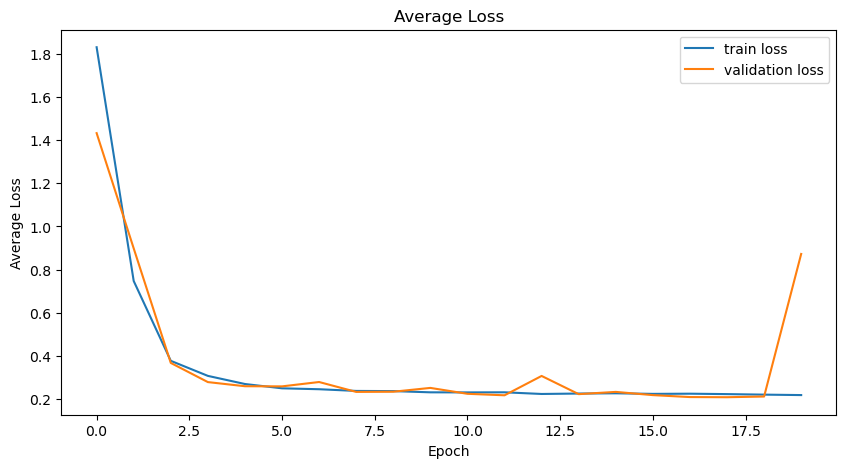

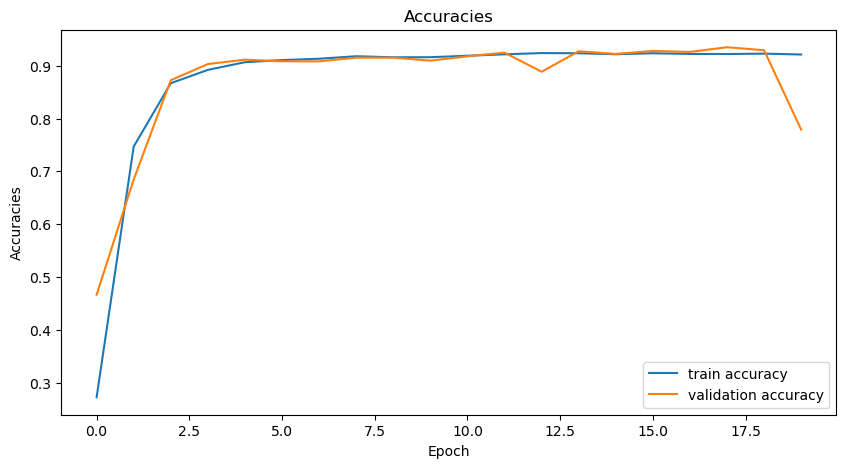

In [20]:
# Let's plot the average train and validation loss over epochs
# to see where the optimal stopping time is in our case

plt.figure(figsize=(10, 5))
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Average Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(accuracies, label="train accuracy")
plt.plot(val_accuracies, label="validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracies')
plt.title('Accuracies')
plt.legend()
plt.show()

<div style="background-color:#f1be3e">

 We choose to stop early if the loss on the validation set increases instead of decreasing twice in a row. If this condition is not met, the training will go on for the specified number of epochs.
 
 We chose "twice" since there can be fluctuations in the validation loss every once in a while, but it doesn't necessarily mean that there is overfitting.

 Early stopping strikes a balance between training long enough to capture essential patterns and stopping before overfitting of the model occurs.

 Note: We have made early stopping optional (by adding a parameter to the "train" method), in case there might be situations where it is wanted for the model to train for the entire amount of epochs specified.

#### Question 10

In [21]:
init = ["normal", "normal", "uniform", "uniform", 
        "he", "he", "xavier", "xavier", "constant", "constant"]

losses_per_approach = []
accuracies_per_approach = []

for i, approach in enumerate(init):
        print()
        print(f"------------ Approach {i + 1}: {approach} ------------")
        layers = [
                Linear(in_features=features.shape[1], out_features=16, weight_init=approach),
                ActivationLRELU(),
                Linear(in_features=16, out_features=8, weight_init=approach),
                ActivationLRELU(),
                Linear(in_features=8, out_features=7, weight_init=approach, is_output=True),
                ActivationSoftMax()
        ]

        net = Network(layers)

        losses, accuracies, _, _, _ , _ , _ , _  = train(net, features, targets, Loss, lr=0.05, epochs=10, batch_size=8)
        losses_per_approach.append(losses)
        accuracies_per_approach.append(accuracies)
     


------------ Approach 1: normal ------------
-------- Epoch 1/10 --------
Loss: 1.4933584498328314, Accuracy: 0.4318719301437148
Validation Loss: 1.2984059462121011, Validation Accuracy: 0.4929936305732484
-------- Epoch 2/10 --------
Loss: 0.8981899981807601, Accuracy: 0.6509004911770057
Validation Loss: 0.8934258345442196, Validation Accuracy: 0.6203821656050955
-------- Epoch 3/10 --------
Loss: 0.7607817180280001, Accuracy: 0.7080225577587775
Validation Loss: 0.7758062206684919, Validation Accuracy: 0.6828025477707006
-------- Epoch 4/10 --------
Loss: 0.6978311254817102, Accuracy: 0.7303983991267964
Validation Loss: 0.6874069814317197, Validation Accuracy: 0.7840764331210192
-------- Epoch 5/10 --------
Loss: 0.6484697004504916, Accuracy: 0.7724213207203929
Validation Loss: 0.9252941358633942, Validation Accuracy: 0.6936305732484076
-------- Epoch 6/10 --------
Loss: 0.5250035312803824, Accuracy: 0.8282699654356922
Validation Loss: 0.45676946375061234, Validation Accuracy: 0.8490

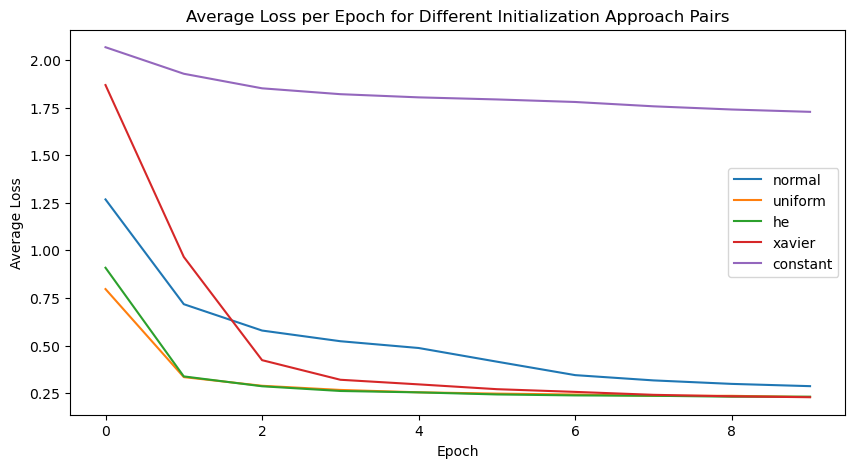

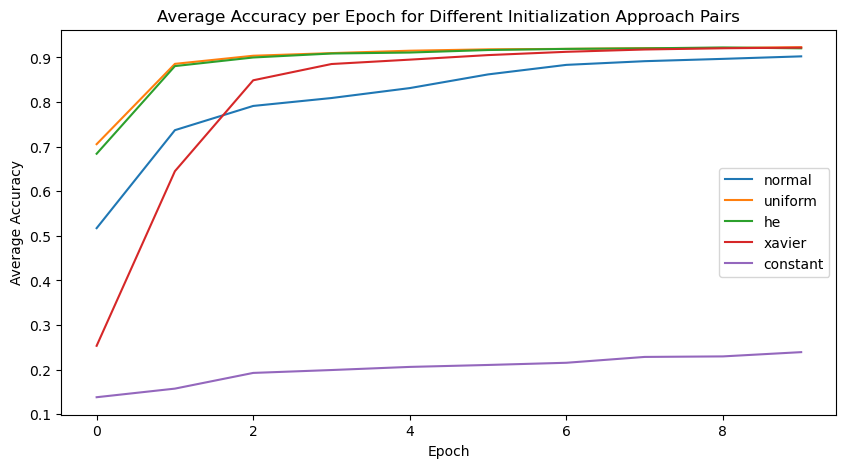

In [22]:
# Calculate average losses for each pair of approaches (per epoch)
avg_losses_per_approach_pair = []
for i in range(0, len(init), 2):
    losses_approach_pair = losses_per_approach[i:i+2]
    avg_losses_pair = [
        np.mean(avg_losses) for avg_losses in zip(*losses_approach_pair)
    ]
    avg_losses_per_approach_pair.append(avg_losses_pair)

# Plot average loss for each pair of approaches (per epoch)
plt.figure(figsize=(10, 5))
for i, (approach1, approach2) in enumerate(zip(init[::2], init[1::2])):
    plt.plot(avg_losses_per_approach_pair[i], label=f"{approach1}")
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Average Loss per Epoch for Different Initialization Approach Pairs')
plt.legend()
plt.show()

# Calculate average accuracies for each pair of approaches (per epoch)
avg_accuracies_per_approach_pair = []
for i in range(0, len(init), 2):
    accuracies_approach_pair = accuracies_per_approach[i:i+2]
    avg_accuracies_pair = [
        np.mean(avg_accuracies) for avg_accuracies in zip(*accuracies_approach_pair)
    ]
    avg_accuracies_per_approach_pair.append(avg_accuracies_pair)

# Plot average accuracy for each pair of approaches (per epoch)
plt.figure(figsize=(10, 5))
for i, (approach1, approach2) in enumerate(zip(init[::2], init[1::2])):
    plt.plot(avg_accuracies_per_approach_pair[i], label=f"{approach1}")
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy per Epoch for Different Initialization Approach Pairs')
plt.legend()
plt.show()

<div style="background-color:#f1be3e">

By default, we initialize weights using the Xavier initialization (from the slides), and we initialize biases with 0's (like we discussed in the lecture).

We will try each of the following initialization approaches (we will compute each of these cases twice and average the results for each approach): 
1. Weights - Normal distribution, Biases = 0 
2. Weights - Uniform distribution, Biases = 0
3. Weights - He initialization, Biases = 0
4. Weights - Xavier initialization, Biases = 0
5. Weights = 1 (constant), Biases = 0

From the plots above, we can observe that the worst performance was for the constant initialization of the weights, as expected (and as discussed in the lectures).

For a small number of epochs, we can observe that the uniform and he initialization give the best results (highest accuracy and lowest loss), but for a larger number of epochs the xavier initialization (using the formula from the slides) catches up and gives the best results.

It can be said however, that the differences between the normal, uniform, he and xavier initialization are not very apparent in our specific scenario, since they do give similar results in the end (for a large enough number of epochs). We will be sticking with the xavier initialization, since it is what we have used until now.

### 1.4 Optimization

#### Question 11

In [23]:
network_10 = Network([
    Linear(in_features=features.shape[1], out_features=10),
    ActivationLRELU(),
    Linear(in_features=10, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_20 = Network([
    Linear(in_features=features.shape[1], out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_30 = Network([
    Linear(in_features=features.shape[1], out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_10_30 = Network([
    Linear(in_features=features.shape[1], out_features=10),
    ActivationLRELU(),
    Linear(in_features=10, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_20_30 = Network([
    Linear(in_features=features.shape[1], out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_30_30 = Network([
    Linear(in_features=features.shape[1], out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_10_20 = Network([
    Linear(in_features=features.shape[1], out_features=10),
    ActivationLRELU(),
    Linear(in_features=10, out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_20_20 = Network([
    Linear(in_features=features.shape[1], out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_30_20 = Network([
    Linear(in_features=features.shape[1], out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_10_10 = Network([
    Linear(in_features=features.shape[1], out_features=10),
    ActivationLRELU(),
    Linear(in_features=10, out_features=10),
    ActivationLRELU(),
    Linear(in_features=10, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_20_10 = Network([
    Linear(in_features=features.shape[1], out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=10),
    ActivationLRELU(),
    Linear(in_features=10, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_30_10 = Network([
    Linear(in_features=features.shape[1], out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=10),
    ActivationLRELU(),
    Linear(in_features=10, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_20_30_10 = Network([
    Linear(in_features=features.shape[1], out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=10),
    ActivationLRELU(),
    Linear(in_features=10, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_20_30_20 = Network([
    Linear(in_features=features.shape[1], out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_20_30_30 = Network([
    Linear(in_features=features.shape[1], out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_30_30_10 = Network([
    Linear(in_features=features.shape[1], out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=10),
    ActivationLRELU(),
    Linear(in_features=10, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_30_30_20 = Network([
    Linear(in_features=features.shape[1], out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=7, is_output=True),
    ActivationSoftMax()
])
network_30_30_30 = Network([
    Linear(in_features=features.shape[1], out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=7, is_output=True),
    ActivationSoftMax()
])
networks_to_test = {
    "10": network_10,
    "20": network_20,
    "30": network_30,
    "10-30": network_10_30,
    "20-30": network_20_30,
    "30-30": network_30_30,
    "10-20": network_10_20,
    "20-20": network_20_20,
    "30-20": network_30_20,
    "10-10": network_10_10,
    "20-10": network_20_10,
    "30-10": network_30_10,
    "20-30-10": network_20_30_10,
    "20-30-20": network_20_30_20,
    "20-30-30": network_20_30_30,
    "30-30-10": network_30_30_10,
    "30-30-20": network_30_30_20,
    "30-30-30": network_30_30_30
    }

In [24]:
k_folds = 10
losses_per_network = {}
accuracies_per_network = {}

for description, network in networks_to_test.items():
    print(f"---- Network {description} ----")
    losses_per_fold = []
    accuracies_per_fold = []

    for fold in range(k_folds):
        print(f"---- Fold {fold + 1} ----")
        losses, accuracies, _, _, _ , _ , _ , _  = train(network, features, targets, Loss, lr=0.05, epochs=10, batch_size=8, 
                               cross_validation=True, k_folds=k_folds, current_fold=fold)
        losses_per_fold.append(losses[-1])
        accuracies_per_fold.append(accuracies[-1])
    
    losses_per_network[description] = np.mean(losses_per_fold)
    accuracies_per_network[description] = np.mean(accuracies_per_fold)

---- Network 10 ----
---- Fold 1 ----
-------- Epoch 1/10 --------
Loss: 1.3363049350732965, Accuracy: 0.5865017282153903
Validation Loss: 0.6189900840898771, Validation Accuracy: 0.8515923566878981
-------- Epoch 2/10 --------
Loss: 0.3743410365459082, Accuracy: 0.899581589958159
Validation Loss: 0.29249045027214815, Validation Accuracy: 0.9101910828025478
-------- Epoch 3/10 --------
Loss: 0.25942763328465224, Accuracy: 0.9155903219938148
Validation Loss: 0.25324318286862224, Validation Accuracy: 0.9146496815286624
-------- Epoch 4/10 --------
Loss: 0.23283927901890084, Accuracy: 0.9210478442786975
Validation Loss: 0.23791789968694502, Validation Accuracy: 0.921656050955414
-------- Epoch 5/10 --------
Loss: 0.22123584201046365, Accuracy: 0.9237766054211388
Validation Loss: 0.22807296708511546, Validation Accuracy: 0.921656050955414
-------- Epoch 6/10 --------
Loss: 0.20980869157130663, Accuracy: 0.9277787884300528
Validation Loss: 0.21294782094911757, Validation Accuracy: 0.9305732

-------- Epoch 9/10 --------
Loss: 0.2007112992380214, Accuracy: 0.934509732581408
Validation Loss: 0.25128399852491673, Validation Accuracy: 0.9191082802547771
-------- Epoch 10/10 --------
Loss: 0.19640073287730167, Accuracy: 0.9390576678188103
Validation Loss: 0.2309578623853577, Validation Accuracy: 0.9222929936305733
Test Accuracy: 0.9339263024142312
---- Fold 5 ----
-------- Epoch 1/10 --------
Loss: 0.21076275192629582, Accuracy: 0.930507549572494
Validation Loss: 0.19227124413157184, Validation Accuracy: 0.9426751592356688
-------- Epoch 2/10 --------
Loss: 0.20478307679775096, Accuracy: 0.9299617973440059
Validation Loss: 0.22013899575807278, Validation Accuracy: 0.9261146496815287
-------- Epoch 3/10 --------
Loss: 0.20210391520340118, Accuracy: 0.9319628888484628
Validation Loss: 0.22273297444031578, Validation Accuracy: 0.9292993630573249
-------- Epoch 4/10 --------
Loss: 0.20366392041796735, Accuracy: 0.9308713843914863
Validation Loss: 0.2156353248951149, Validation Accu

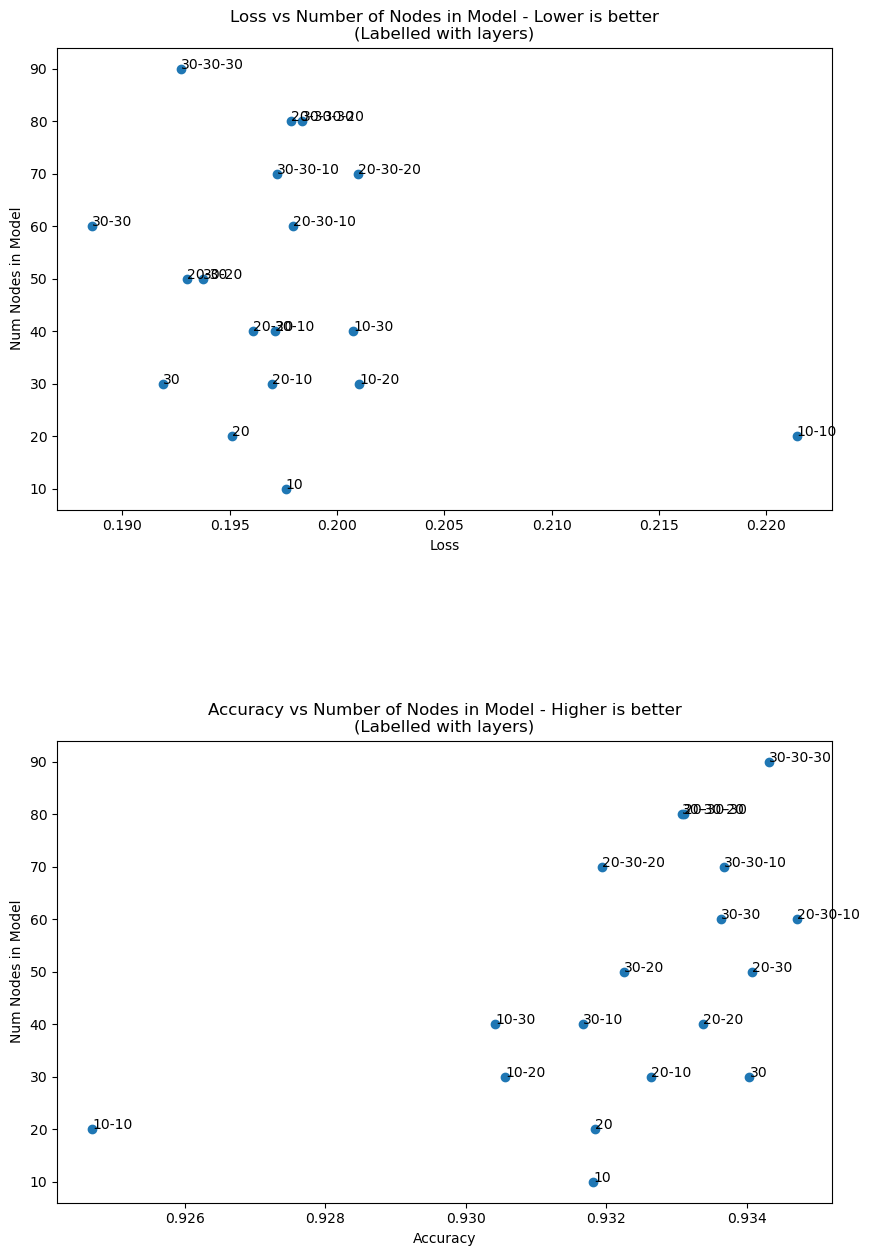

In [25]:
point_labels = list(accuracies_per_network.keys())
point_accuracies = list(accuracies_per_network.values())
point_losses = list(losses_per_network.values())
point_num_nodes = []
for label in point_labels:
    num_nodes = 0
    for n in label.split("-"): num_nodes += int(n)
    point_num_nodes.append(num_nodes)

fig, ax = plt.subplots(2, figsize=(10,15))
fig.subplots_adjust(hspace=0.5)

ax[0].scatter(point_losses, point_num_nodes)
ax[0].set_xlabel("Loss")
ax[0].set_ylabel("Num Nodes in Model")
ax[0].set_title("Loss vs Number of Nodes in Model - Lower is better\n(Labelled with layers)")
for i, label in enumerate(point_labels):
    ax[0].annotate(label, (point_losses[i], point_num_nodes[i]))

ax[1].scatter(point_accuracies, point_num_nodes)
ax[1].set_xlabel("Accuracy")
ax[1].set_ylabel("Num Nodes in Model")
ax[1].set_title("Accuracy vs Number of Nodes in Model - Higher is better\n(Labelled with layers)")
for i, label in enumerate(point_labels):
    ax[1].annotate(label, (point_accuracies[i], point_num_nodes[i]))



<div style="background-color:#f1be3e">

The above graphs are the result of the average results of the 10 fold cross validation of 15 models. The only differences between these models is the number of nodes in each layer.
We test a few models with 2 layers and then top performing models with two layers are extended with a range of 3rd layers to get a good overview of the effect of layers as well as the total number of nodes involved. Loss and accuracy are graphed above in comparison to the total number of nodes across all layers. 

It should be said that the accuracies and losses of all networks seem quite similar, with only minor differences. These may even be within the margin of error, so the results should be taken with a grain of salt. On the upside, all of the models do pretty well! 
This seems to indicate that even the smallest network of 10 is enough to grasp the patterns present in our dataset. Interestingly the models like 10-10, 10-30, and 10-20 perform the worst, even worse than just 10. So only 10 in the first layer followed by more layers is a bad approach. The models with 10 in the first layer generally do worse than the models with 20 in the first layer, which in turn generally do worse than the models with 30 in the first layer. This may be due to the fact that the relationship between all of the input features cannot adequately be captured in a 10 or 20 nodes, resulting in 30 being the best of these options.
The 30-30-30 model performs the best out of all, followed closely by the 30-30-10 model, with 30 in 3rd place. That leads us to believe that 30 in the first layer and second layer is a very good choice, and that subsequent layers may be less relevant. If the data has already been transformed through two layers of 30 nodes, most relevant information has been extracted with diminishing returns afterwards. 
Nonetheless we will use the 30-30-30 model as it proves the best of these models.


#### Question 12

In [26]:
train_losses_per_run=[]
train_accuracies_per_run=[]
validation_losses_per_run=[]
validation_accuracies_per_run=[]


for run in range(5):
    net = Network([
        Linear(in_features=features.shape[1], out_features=30),
        ActivationLRELU(),
        Linear(in_features=30, out_features=30),
        ActivationLRELU(),
        Linear(in_features=30, out_features=30),
        ActivationLRELU(),
        Linear(in_features=30, out_features=7, is_output=True),
        ActivationSoftMax()
    ])
    print(f"---- Run {run + 1} ----")
    train_losses, train_accuracies, validation_losses, validation_accuracies, _, _, _, _ = train(net, features, targets, Loss, lr=0.05, epochs=20, batch_size=8)
    train_losses_per_run.append(train_losses)
    train_accuracies_per_run.append(train_accuracies)
    validation_losses_per_run.append(validation_losses)
    validation_accuracies_per_run.append(validation_accuracies)

train_losses = np.mean(train_losses_per_run, axis=0)
train_accuracies = np.mean(train_accuracies_per_run, axis=0)
validation_losses = np.mean(validation_losses_per_run, axis=0)
validation_accuracies = np.mean(validation_accuracies_per_run, axis=0)

---- Run 1 ----
-------- Epoch 1/20 --------
Loss: 1.9469909421360798, Accuracy: 0.1377114789885392
Validation Loss: 1.9499891935766955, Validation Accuracy: 0.12547770700636943
-------- Epoch 2/20 --------
Loss: 1.9457889333162615, Accuracy: 0.15044569765326543
Validation Loss: 1.9457246903397853, Validation Accuracy: 0.12547770700636943
-------- Epoch 3/20 --------
Loss: 1.9191436753791566, Accuracy: 0.1893760232854284
Validation Loss: 1.7360904101874086, Validation Accuracy: 0.34076433121019106
-------- Epoch 4/20 --------
Loss: 1.3341888150654182, Accuracy: 0.43205384755321086
Validation Loss: 0.850021037145481, Validation Accuracy: 0.6745222929936305
-------- Epoch 5/20 --------
Loss: 0.6544982246037846, Accuracy: 0.7600509368746589
Validation Loss: 0.5358704985825831, Validation Accuracy: 0.8369426751592357
-------- Epoch 6/20 --------
Loss: 0.40372098110373394, Accuracy: 0.8717482263052574
Validation Loss: 0.3534393872053309, Validation Accuracy: 0.8961783439490446
-------- Epoc

-------- Epoch 6/20 --------
Loss: 0.33887054448743814, Accuracy: 0.8868473712934328
Validation Loss: 0.30240037291332456, Validation Accuracy: 0.9006369426751593
-------- Epoch 7/20 --------
Loss: 0.2821599654408064, Accuracy: 0.9083136256139712
Validation Loss: 0.2867571445304916, Validation Accuracy: 0.9038216560509554
-------- Epoch 8/20 --------
Loss: 0.2651781280403101, Accuracy: 0.9155903219938148
Validation Loss: 0.27910225117153376, Validation Accuracy: 0.9082802547770701
-------- Epoch 9/20 --------
Loss: 0.2568326301527461, Accuracy: 0.9186829179552484
Validation Loss: 0.24944523835224733, Validation Accuracy: 0.9229299363057325
-------- Epoch 10/20 --------
Loss: 0.24223678199306511, Accuracy: 0.9232308531926505
Validation Loss: 0.8179612401135855, Validation Accuracy: 0.7815286624203822
-------- Epoch 11/20 --------
Loss: 0.24235437632958587, Accuracy: 0.9185010005457522
Validation Loss: 0.235932076301196, Validation Accuracy: 0.9261146496815287
-------- Epoch 12/20 ------

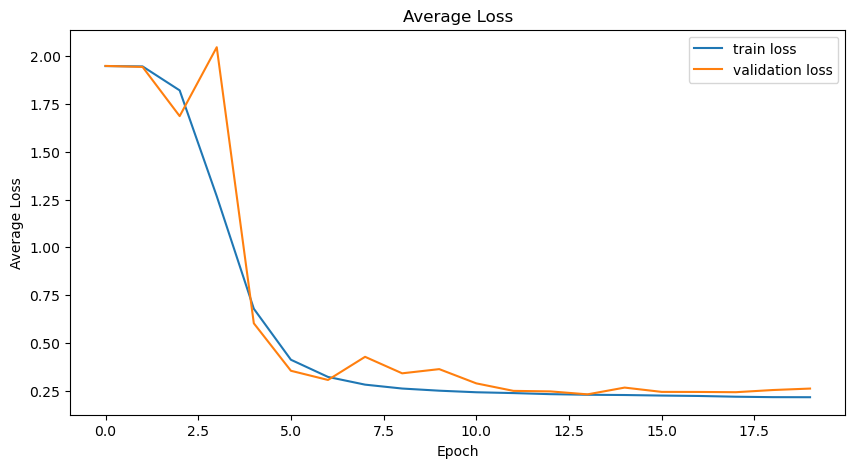

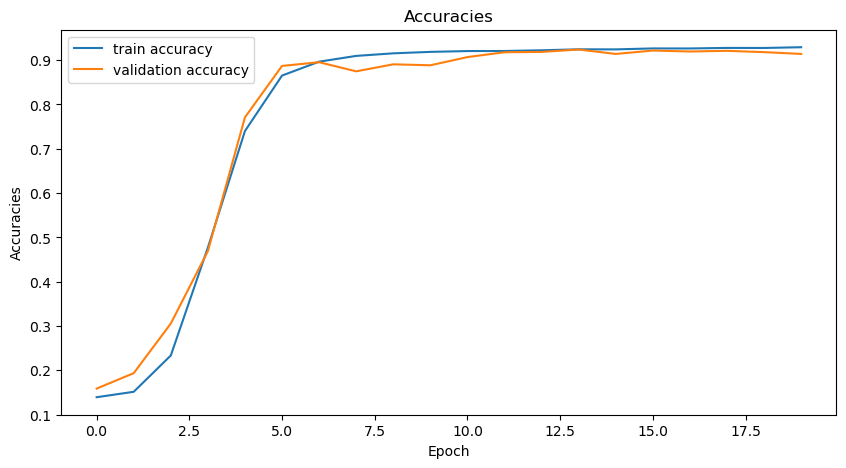

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="train loss")
plt.plot(validation_losses, label="validation loss")
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Average Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="train accuracy")
plt.plot(validation_accuracies, label="validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracies')
plt.title('Accuracies')
plt.legend()
plt.show()

<div style="background-color:#f1be3e">

According to the scatter plot of the accuracies and losses of all the tested models, the 30-30-30 model came out on top. Above are the train and validation losses and accuracies across all epochs are shown. We can see that the validation accuracy seems to peak around epoch 13 and the loss is minimized. After this there are peaks where the model performs worse, likely due to being overfitted. Therefore we shall use the model at 13 epochs of training.



### 1.5 Evaluation

#### Question 13

In [28]:
#success rate of network on test set
#success rate of network on validation set
#how do they compare
#Training a network on our data
net_13 = Network([
    Linear(in_features=features.shape[1], out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=30),
    ActivationLRELU(),
    Linear(in_features=30, out_features=20),
    ActivationLRELU(),
    Linear(in_features=20, out_features=7, is_output=True),
    ActivationSoftMax()
])
train_losses, train_accuracies, validation_losses, validation_accuracies, test_inputs, test_labels , test_accuracy , test_loss  = train(net_13, features, targets, Loss, lr=0.05, epochs=13, batch_size=8)



-------- Epoch 1/13 --------
Loss: 1.9475888717316094, Accuracy: 0.13425504820811351
Validation Loss: 1.946866779495829, Validation Accuracy: 0.14267515923566879
-------- Epoch 2/13 --------
Loss: 1.946282423870553, Accuracy: 0.14680734946334364
Validation Loss: 1.9422620433223534, Validation Accuracy: 0.2751592356687898
-------- Epoch 3/13 --------
Loss: 1.805580107568798, Accuracy: 0.2446789157722394
Validation Loss: 1.4951225978937603, Validation Accuracy: 0.3560509554140127
-------- Epoch 4/13 --------
Loss: 1.3512098005823923, Accuracy: 0.41404402401309803
Validation Loss: 1.5565519268360053, Validation Accuracy: 0.4031847133757962
-------- Epoch 5/13 --------
Loss: 0.8421364429192438, Accuracy: 0.6925595779516099
Validation Loss: 0.6031275019646785, Validation Accuracy: 0.7980891719745223
-------- Epoch 6/13 --------
Loss: 0.5715876173848983, Accuracy: 0.8117154811715481
Validation Loss: 0.8621702491438052, Validation Accuracy: 0.7477707006369426
-------- Epoch 7/13 --------
Loss

In [29]:
print("Loss on test set - ", test_loss)
print("Loss on validation set - ", validation_losses[-1])
print("Accuracy on test set - ", test_accuracy)
print("Accuracy on validation set - ", validation_accuracies[-1])


Loss on test set -  0.24876038118745858
Loss on validation set -  0.27984979313866226
Accuracy on test set -  0.9148665819567979
Accuracy on validation set -  0.9114649681528663


<div style="background-color:#f1be3e">

As can be seen above, the success rate of the network is quite high, reaching 91% on both the test and the validation sets. The loss of the test set is 0.26, while the loss of the validation set is 0.29. The loss of the validation set is slightly higher, which is in line with our expectations. However, given that there is no significant difference in the values, we find it reasonable to conclude that the network avoids overfitting and shows very satisfactory performance. 

#### Question 14

C:\Users\ewasm\AppData\Local\Temp\ipykernel_16432\335551615.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(alpha)
C:\Users\ewasm\AppData\Local\Temp\ipykernel_16432\335551615.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(alpha)


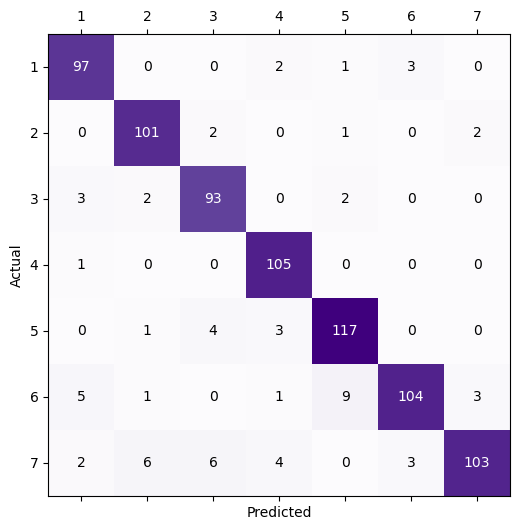

In [30]:
#Define a confusion matrix method

def confusion_matrix(net: Network, inputs: np.array, labels: np.array, num_labels: int) -> np.array:
    confusion_matrix = np.zeros((num_labels, num_labels))
    pred = net.forward(inputs)
    pred = np.squeeze(pred)
    pred = np.argmax(pred, axis=1)
    #For each prediction and label augment the right field in the cnf
    for prediction, label in zip(pred, labels):
        #print(prediction, int(label)
        confusion_matrix[prediction, int(label)-1] += 1

    return confusion_matrix

#Run the confusion matrix method
cm = confusion_matrix(net_13, test_inputs, test_labels, 7)

#Plot the confusion matrix
alpha = np.arange(0, 8)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xticklabels(alpha)
ax.set_yticklabels(alpha)
cax = ax.matshow(cm,  cmap='Purples')

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, '{}'.format(int(val)), ha='center', va='center', color='black' if val < 50 else 'white')

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


<div style="background-color:#f1be3e">


### Confusion matrix explanation
What is seen above is the confusion matrix of the predictions of our neural network and the correct labels. On the X axis of the matrix, the labels represent the class label that was predicted by our network. The Y axis represents the correct labels. The confusion matrix represents the correctness of our predictions for the test set – the number in each cell of the matrix represents the number of that type of prediction. Therefore, in cell (3,7) one can see the number of inputs that should have been classified as class 7, since that is the correct prediction, but were classified by our network as class 3. The diagonal of the confusion matrix, highlighted here in dark purple, contains the number of correct predictions for each class – for example in cell (5,5) one can see that 100 inputs were correctly classified as class 5.

### Analysis of confusion matrix
The desired confusion matrix, for a well-functioning neural network, should have high numbers on the diagonal and small numbers in all other cells of the matrix, as that means the predictions were correct in the majority of the cases.

A confusion matrix is also helpful in pointing out which classes are most prone to being misclassified, or which labels are too readily assigned by our network.

As can be seen in our confusion matrix, class 7 was misclassified as other classes by our network quite a few times. Another observation to be made is that our network predicted inputs to be class 1 quite often, even when that was not the case. A final small thing of note is that class 4 was misclassified as class 7 a couple times, which is interesting to note when the inputs that did belong to class 7 were so often misclassified as class 4 as well.

However, in general the numbers on the diagonal are much, much higher than the numbers in the other cells of the matrix, representing the high accuracy of our network.

#### Question 15

In [31]:
#Get the predictions for unknown from the network
prediction = net_13.forward(unknown)
prediction = np.squeeze(prediction)
prediction = np.argmax(prediction, axis=1) + 1

#Write these predictions to a file call output.txt
with open("output.txt", "w") as output:
    for i in range(len(prediction) - 1):
        output.write("%s," % prediction[i])
    output.write("%s" % prediction[-1])



<div style="background-color:#f1be3e">

The autograder score from the text file created above was 15.5/20.

### 1.6 Scikit-learn

#### Question 16

<div style="background-color:#f1be3e">

Using scikit-learn, we compared the following:
- Two different hidden layers' sizes: 30-30-30 and 30-30-20
- Two different activation functions: tanh and ReLU
- Two different alphas: 0 and 0.01
- Two different learning rates: 0.01 and 0.05

For the hidden layers, it considered 30-30-20 to be the best fit, while we chose 30-30-30. For the activation functions, it chose ReLU with alpha value 0.01 - which would be equivalent to LReLU, the one we use. For the learning rates, it chose 0.01 while we chose 0.05.

The following table contains measurements that scikit-learn has given as a result of the training, versus the measurements we found as part of our training. 

Note: all the values are approximated to 4 decimals for the sake of simplicity.

| Measurement | Our Training | Scikit-learn training |
|-----------------|-----------------|-----------------|
| Training Cross-Entropy Loss | 0.1063 | 0.1957 |
| Training accuracy | 0.9600 | 0.9322 |
| Validation Accuracy | 0.9032 | 0.9167 |
| Test Accuracy | 0.9111 | 0.9288 |

We can observe from the table values, that our model most likely overfits on the training set, since our training accuracy is higher than the scikit-learn one, but the validation and test accuracies are lower. This might be because we did not use an early-stop mechanism for this training session specifically, since the scikit-learn one explicitly meantioned that they were going to have 200 iterations (epochs), and the early stopping mechanism will probably be different compared to ours.

#### Question 17

<div style="background-color:#f1be3e">
The segment below is copied from the Toolbox.ipynb, so that we would have all hyperparameters listed.

Best parameters found by grid search:
-activation: relu
-alpha: 0.01
-batch_size: auto
-early_stopping: True
-hidden_layer_sizes: [30, 30, 20]
-learning_rate_init: 0.01
-max_iter: 200
-n_iter_no_change: 10
-random_state: 42
-solver: adam
-tol: 0.0001
-validation_fraction: 0.18000000000000002

Based on these, we will change our own hyperparameters and rerun the training. The following table contains the results of our old training (with our hyperparameters) and the results of the new one (with the scikit-learn optimal parameters).

| Measurement | Old Training | New Training |
|-----------------|-----------------|-----------------|
| Training Cross-Entropy Loss | 0.1063 | 0.1691 |
| Training accuracy | 0.9600 | 0.9429 |
| Validation Accuracy | 0.9032 | 0.9185 |
| Test Accuracy | 0.9111 | 0.9123 |

As we can see from the table values above, the new training (using scikit hyperparameters) gives a better performance: better values for the validation and test accuracy, while having a smaller accuracy on the training set. This could mean that the new training did not overfit the data as much. This could be due to the change in learning rate, from 0.05 to 0.01, meaning that now the model learns a bit slower at each step, compared to before, which can contribute to reducing overfitting. The 0.05 learning rate can be a bit too high considering we have up to 200 epochs, therefore a value of 0.01 is sufficient and helps in reducing the overfit on training data.

This result also makes sense considering that we are not using an early-stopping mechanism (in our implementation, the early stopping is optional and can be toggled on depending on what is wanted), so overfitting is more likely to occur. We chose not to use one since it probably is different compared to the one the scikit-learn uses, and it would contribute too much to having different resulting values. 

### 1.7 Reflection

#### Question 18

<div style="background-color:#f1be3e">

One such example where misclasification resulting from bias can lead to harmful consequences could be in the field of predictive policing. 

Let's consider some policing software that utilizes historical crime data to forecast where future crimes are likely to occur. If the historical data used to train these algorithms reflects biased policing practices, such as over-policing of minority neighborhoods, the software may disproportionately target these communities and suggest increased surveillance and law enforcement interventions - these are potentially harmful consequences resulting from bias.

#### Question 19

<div style="background-color:#f1be3e">

1. The first approach may be having more diversity in the communities that develop these classification tools. By having a diverse community, including people from different minorities, genders, and backgrounds, the development process can benefit from a broader range of perspectives and experiences. This diversity can lead to more inclusive and equitable classification tools that are less likely to perpetuate biases and discrimination. Additionally, diverse teams are better equipped to recognize and address potential biases during the development and testing phases. This will nonetheless reduce the harmful effects of unjust classification.
2. Another approach to mitigate the harm produced by unjust classification is to prioritize transparency and accountability in the deployment of classification tools. This involves establishing clear guidelines and protocols for the development, testing, and implementation of these tools, as well as ensuring that the decision-making processes behind them are transparent and accessible to stakeholders. By fostering transparency, users can better understand how classification algorithms operate and the potential implications of their outputs. Furthermore, holding developers and operators accountable for the performance and impact of their classification tools encourages responsible practices and incentivizes the continuous improvement of algorithms to minimize bias and discrimination. This minimization in discrimination and bias will lead to lower harm produced by unjust classification.

While these two approaches contribute to reducing the harm produced by unjust classification, it is unlikely that these measures alone will completely eradicate the problem. 
- It is very hard even for a diverse group of developers to recognize and address ALL forms of bias and discrimination. Moreso, diversity within development teams does not guarantee complete immunity to unconscious bias that can still manifest despite besst efforts.
- While transparency and accountability are crucial in ensuring that classification tools are developed and deployed responsibly, they do not guarantee the total absence of bias or discrimination. Even with clear guidelines and protocols in place, biases may still exist within the data used to train algorithms or in the design of the algorithms themselves. 

### 1.8 Pen and paper

#### Question 20

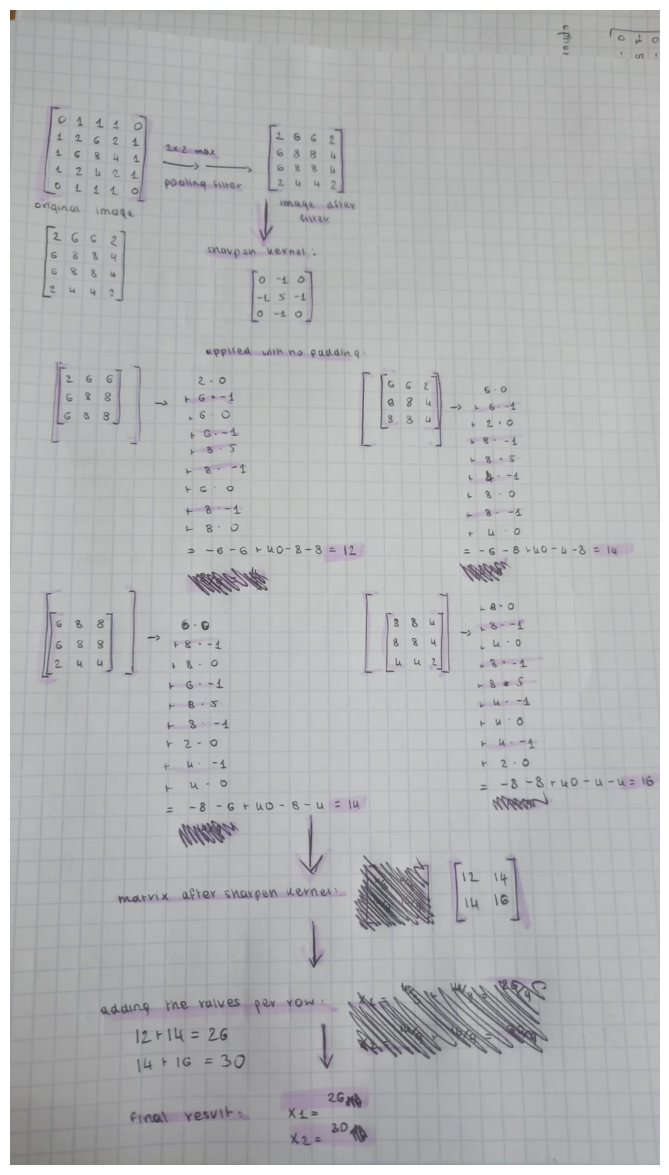

In [32]:
plt.figure(figsize = (15,15))
plt.imshow(mpimg.imread("ex20.jpg"))
plt.axis('off')
plt.show()

#### Question 21

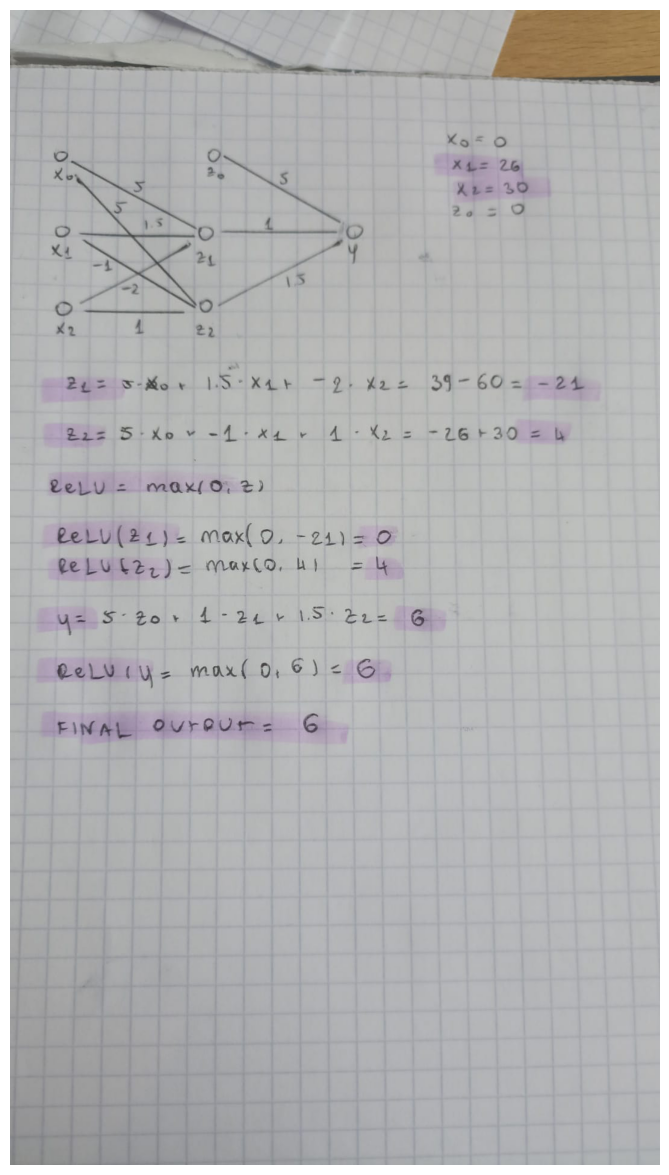

In [33]:
plt.figure(figsize = (15,15))
plt.imshow(mpimg.imread("ex21.jpg"))
plt.axis('off')
plt.show()

### 1.9 Division of work

#### Question 22

<div style="background-color:#f1be3e">


|          Component          |  Antonio Lupu   |  Eve Smura   |  Jannes Kelso   |  Maria Cristescu   |
|-----------------------------|-----------|-----------|-----------|-----------|
| Code (design)               |     25%     |     25%     |     25%     |     25%     |
| Code (implementation)       |     25%     |     25%     |     25%     |     25%     |
| Code (validation)           |     25%     |     25%     |     25%     |     25%     |
| Experiments (execution)     |     25%     |     25%     |     25%     |     25%     |
| Experiments (analysis)      |     25%     |     25%     |     25%     |     25%     |
| Experiments (visualization) |     25%     |     25%     |     25%     |     25%     |
| Report (original draft)     |     25%     |     25%     |     25%     |     25%     |
| Report (reviewing, editing) |     25%     |     25%     |     25%     |     25%     |

### References

<div style="background-color:#f1be3e">

**If you made use of any non-course resources, cite them below.**